# Support Vector Machine Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

from mlxtend.plotting import plot_decision_regions


### Import the admissions data set (admissions.csv).

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/admissions.csv')
data.head()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GRE         400 non-null    int64  
 1   TOEFL       400 non-null    int64  
 2   SchoolRank  400 non-null    int64  
 3   SOP         400 non-null    float64
 4   LOR         400 non-null    float64
 5   GPA         400 non-null    float64
 6   Research    400 non-null    int64  
 7   Admitted    400 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 25.1 KB


## Data Exploration

Before jumping into training a model on the data, let's explore it to get a better sense of the relationships between our features and the target variable.

### Call the Pandas `describe()` method on the data frame to get view the average values and variability for each variable.

In [4]:
data.describe()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research,Admitted
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.617500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.486606
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000


### Group the data by the Admitted field and compute the average values for each field.

In [5]:
data.groupby('Admitted').mean()

,GRE,TOEFL,SchoolRank,SOP,LOR,GPA,Research
Admitted,,,,,,,
0,307.013072,102.588235,2.261438,2.741830,2.875817,8.087974,0.248366
1,322.874494,110.396761,3.599190,3.807692,3.809717,8.915425,0.732794


### How many students that applied were admitted vs. not admitted? What percentage of students were admitted vs. not admitted? 

In [6]:
data['Admitted'].sum()
data['Admitted'].mean()

0.6175

### What percent of students with research experience were admitted?

In [7]:
data.groupby('Research')['Admitted'].mean()

Research
0    0.364641
1    0.826484
Name: Admitted, dtype: float64

### What percent of students admitted had research experience?

In [8]:
data.groupby('Admitted')['Research'].mean()

Admitted
0    0.248366
1    0.732794
Name: Research, dtype: float64

### Generate a grouped bar chart showing the number of admissions by SOP score, with separate bars for admitted and not admitted.

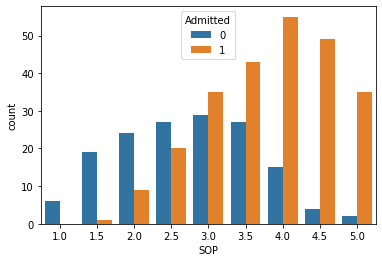

In [9]:
#plt.bar(x = data['Admitted'], height=data['SOP'])

sns.countplot('SOP', hue='Admitted', data=data)
plt.show()

### Generate a grouped bar chart showing the number of admissions by LOR score, with separate bars for admitted and not admitted.

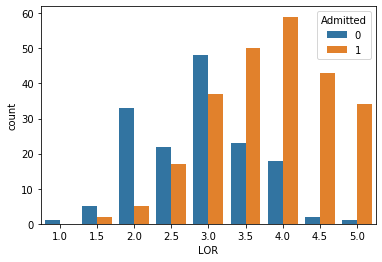

In [10]:
sns.countplot('LOR', hue='Admitted', data=data)
plt.show()

### Generate a scatter plot where the axes are GRE and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

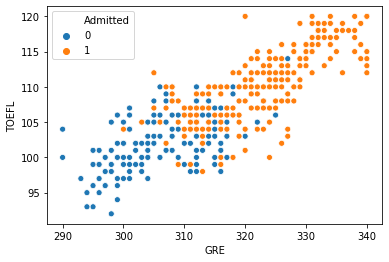

In [11]:
sns.scatterplot('GRE', 'TOEFL', hue='Admitted', data=data)

### Generate a scatter plot where the axes are GPA and TOEFL fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

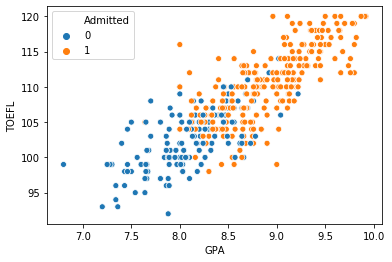

In [12]:
sns.scatterplot('GPA', 'TOEFL', hue='Admitted', data=data)

### Generate a scatter plot where the axes are GRE and GPA fields and the data points are color-coded by whether the student was admitted.

Think about how you might go about determining the decision boundary to separate admitted from non-admitted students.

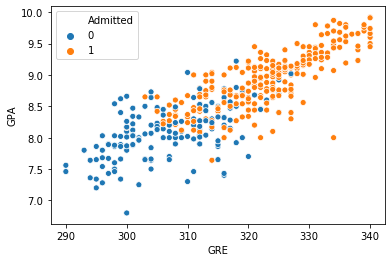

In [13]:
sns.scatterplot('GRE', 'GPA', hue='Admitted', data=data)

## Model Training and Evaluation

Now that we have gained a sense of familiarity with our data, let's train a model to predict admissions.

### Split the data into a training and test sets, where the test set contains 20% of the data.

In [14]:
X = data.drop(columns='Admitted')
y = data['Admitted']

In [15]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2)

### Use the linear kernel to train a Support Vector Classifier (SVC) model on the training data. Report the scores for both the training and test data.

In [16]:
svc1 = SVC(kernel='linear', probability=True)

svc1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Generate a classification report for the SVC model you trained.

How do the evaluation metrics differ across classes?

In [17]:
y_pred = svc1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        37
           1       0.85      0.93      0.89        43

    accuracy                           0.88        80
   macro avg       0.88      0.87      0.87        80
weighted avg       0.88      0.88      0.87        80



In [18]:
print(svc1.score(X_train, y_train))
print(svc1.score(X_test, y_test))

0.88125
0.875


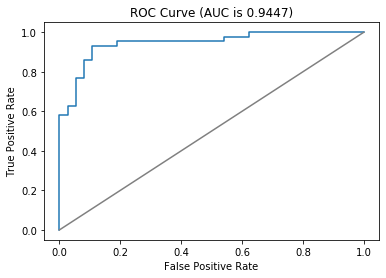

In [19]:
y_prob = svc1.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], c="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC is {auc:.4f})")
plt.show()

In [21]:
print(confusion_matrix(y_test, y_pred, labels=[0,1]))

[[30  7]
 [ 3 40]]


In [22]:
from sklearn.preprocessing import MinMaxScaler
X = data.drop(columns='Admitted')
y = data['Admitted']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
svc2 = SVC(kernel='linear', probability=True)

svc2.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [24]:
y_pred = svc2.predict(X_train_scaled)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       116
           1       0.90      0.91      0.91       204

    accuracy                           0.88       320
   macro avg       0.87      0.87      0.87       320
weighted avg       0.88      0.88      0.88       320



In [25]:
print(confusion_matrix(y_train, y_pred))

[[ 96  20]
 [ 18 186]]


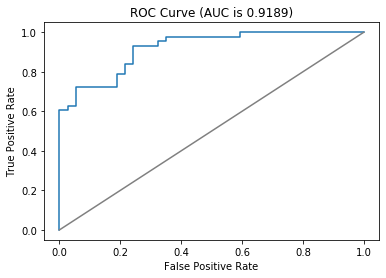

In [26]:
y_prob = svc2.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], c="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC is {auc:.4f})")
plt.show()